# **Abalone Analysis**


**Problem Statement📝**

Determining the age of an abalone typically involves cutting the shell through the cone, staining it, and counting the number of growth rings under a microscope is a tedious and time-consuming process. However, various physical measurements, which are much easier to obtain, can be used to estimate the age. Additional factors such as weather patterns and location, which affect food availability, may also be relevant for more accurate predictions. For now, we are utilizing machine learning techniques to predict the age based on these physical measurements.

### 1. Importing necessary libraries📚

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import shapiro, kstest, norm
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Loading the data💾

In [101]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# metadata 
abalone.metadata



{'uci_id': 1,
 'name': 'Abalone',
 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone',
 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv',
 'abstract': 'Predict the age of abalone from physical measurements',
 'area': 'Biology',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Tabular'],
 'num_instances': 4177,
 'num_features': 8,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': [],
 'target_col': ['Rings'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C55C7W',
 'creators': ['Warwick Nash',
  'Tracy Sellers',
  'Simon Talbot',
  'Andrew Cawthorn',
  'Wes Ford'],
 'intro_paper': None,
 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of r

In [102]:
# variable information 
abalone.variables

,name,role,type,demographic,description,units,missing_values
0,Sex,Feature,Categorical,None,"M, F, and I (infant)",None,no
1,Length,Feature,Continuous,None,Longest shell measurement,mm,no
2,Diameter,Feature,Continuous,None,perpendicular to length,mm,no
3,Height,Feature,Continuous,None,with meat in shell,mm,no
4,Whole_weight,Feature,Continuous,None,whole abalone,grams,no
5,Shucked_weight,Feature,Continuous,None,weight of meat,grams,no
6,Viscera_weight,Feature,Continuous,None,gut weight (after bleeding),grams,no
7,Shell_weight,Feature,Continuous,None,after being dried,grams,no
8,Rings,Target,Integer,None,+1.5 gives the age in years,None,no


In [103]:
# Load features and targets into a single DataFrame
df = pd.DataFrame(data=abalone.data.features, columns=abalone.data.feature_names)
df['Rings'] = abalone.data.targets

df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [104]:
# Checking the shape of the data
df.shape

(4177, 9)

* It has 4177 observations, 9 columns/features

In [105]:
# Checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


* Most of the columns are float datatype.

In [106]:
# Checking the statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


##### **Observations:**

* None of the features have minimum = 0 except Height (requires re-check)
* Average length is 0.52
* Each feature has difference scale range

In [107]:
# Checking the statistical summary of categorical columns
df.describe(include='object').T


,count,unique,top,freq
Sex,4177,3,M,1528


* Most of the abalones are male

In [108]:
# Checking for duplicates
df.duplicated().sum()

0

* There are no duplicates

In [109]:
# Checking for null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

* There are no null values in teh dataframe

In [110]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

### 3. Exploratory Data Analysis(EDA)📊

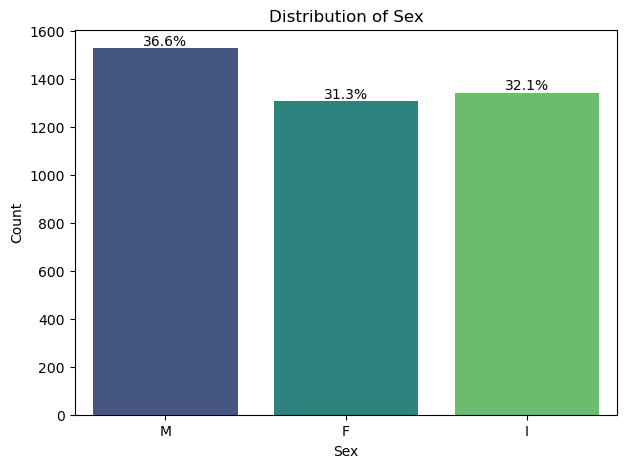

In [111]:
# Plotting the 'sex' column
plt.figure(figsize=[7, 5])
ax = sns.countplot(data=df, x='Sex', palette="viridis")

# Add percentage labels
total = len(df['Sex'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

##### **Observations:**

* The dataset contains three categories of sex.
* The category "I" represents infants who have not yet matured.

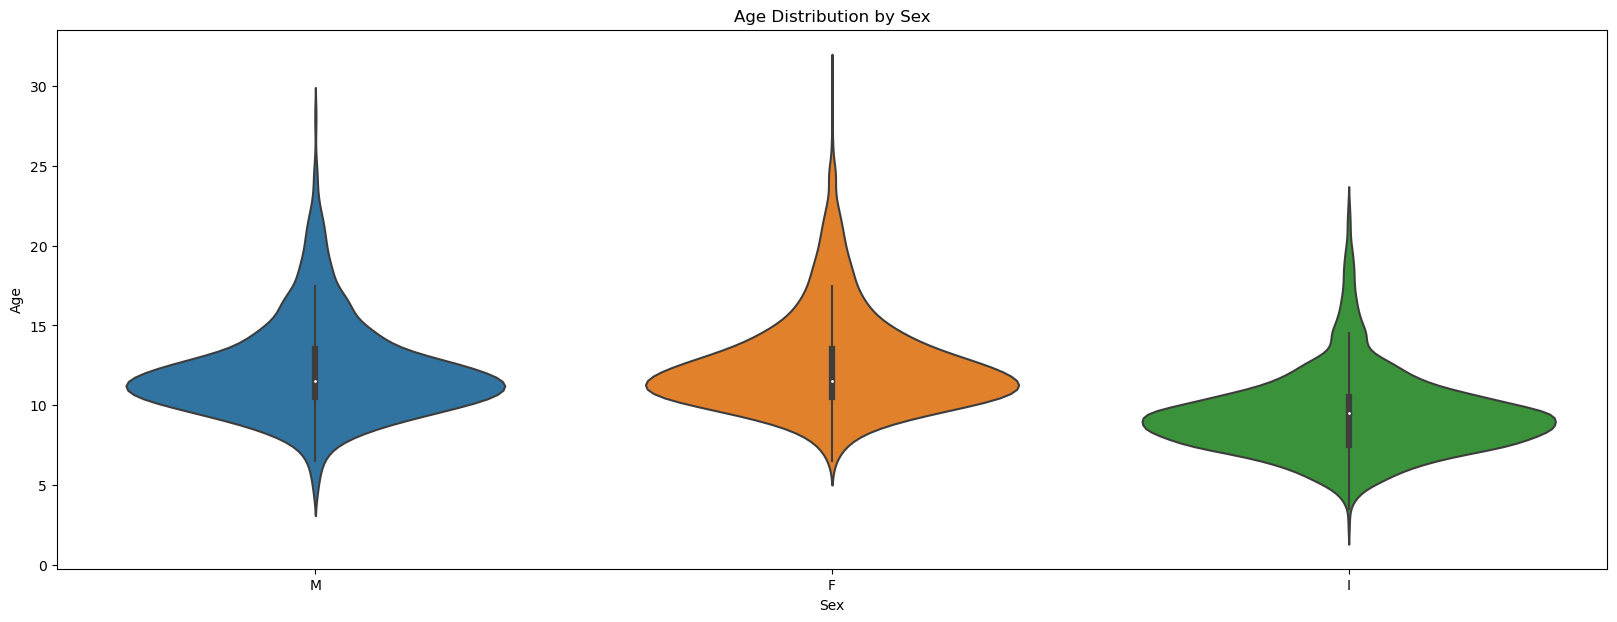

In [112]:
# Deriving Age from the Rings Column
# The formula for Age is: Age = Rings + 1.5
df['Age'] = df['Rings'] + 1.5

# Visualization of Age by Sex
plt.figure(figsize=(20, 7))

# Violin plot to show the distribution of Age by Sex
sns.violinplot(x='Sex', y='Age', data=df)

# Addding titles and labels for clarity
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

##### **Observations:**

* Males: The majority are aged between 7.5 and 19 years.
* Females: The majority are aged between 8 and 19 years.
* Infants: The majority are aged between 6 and just under 10 years. 

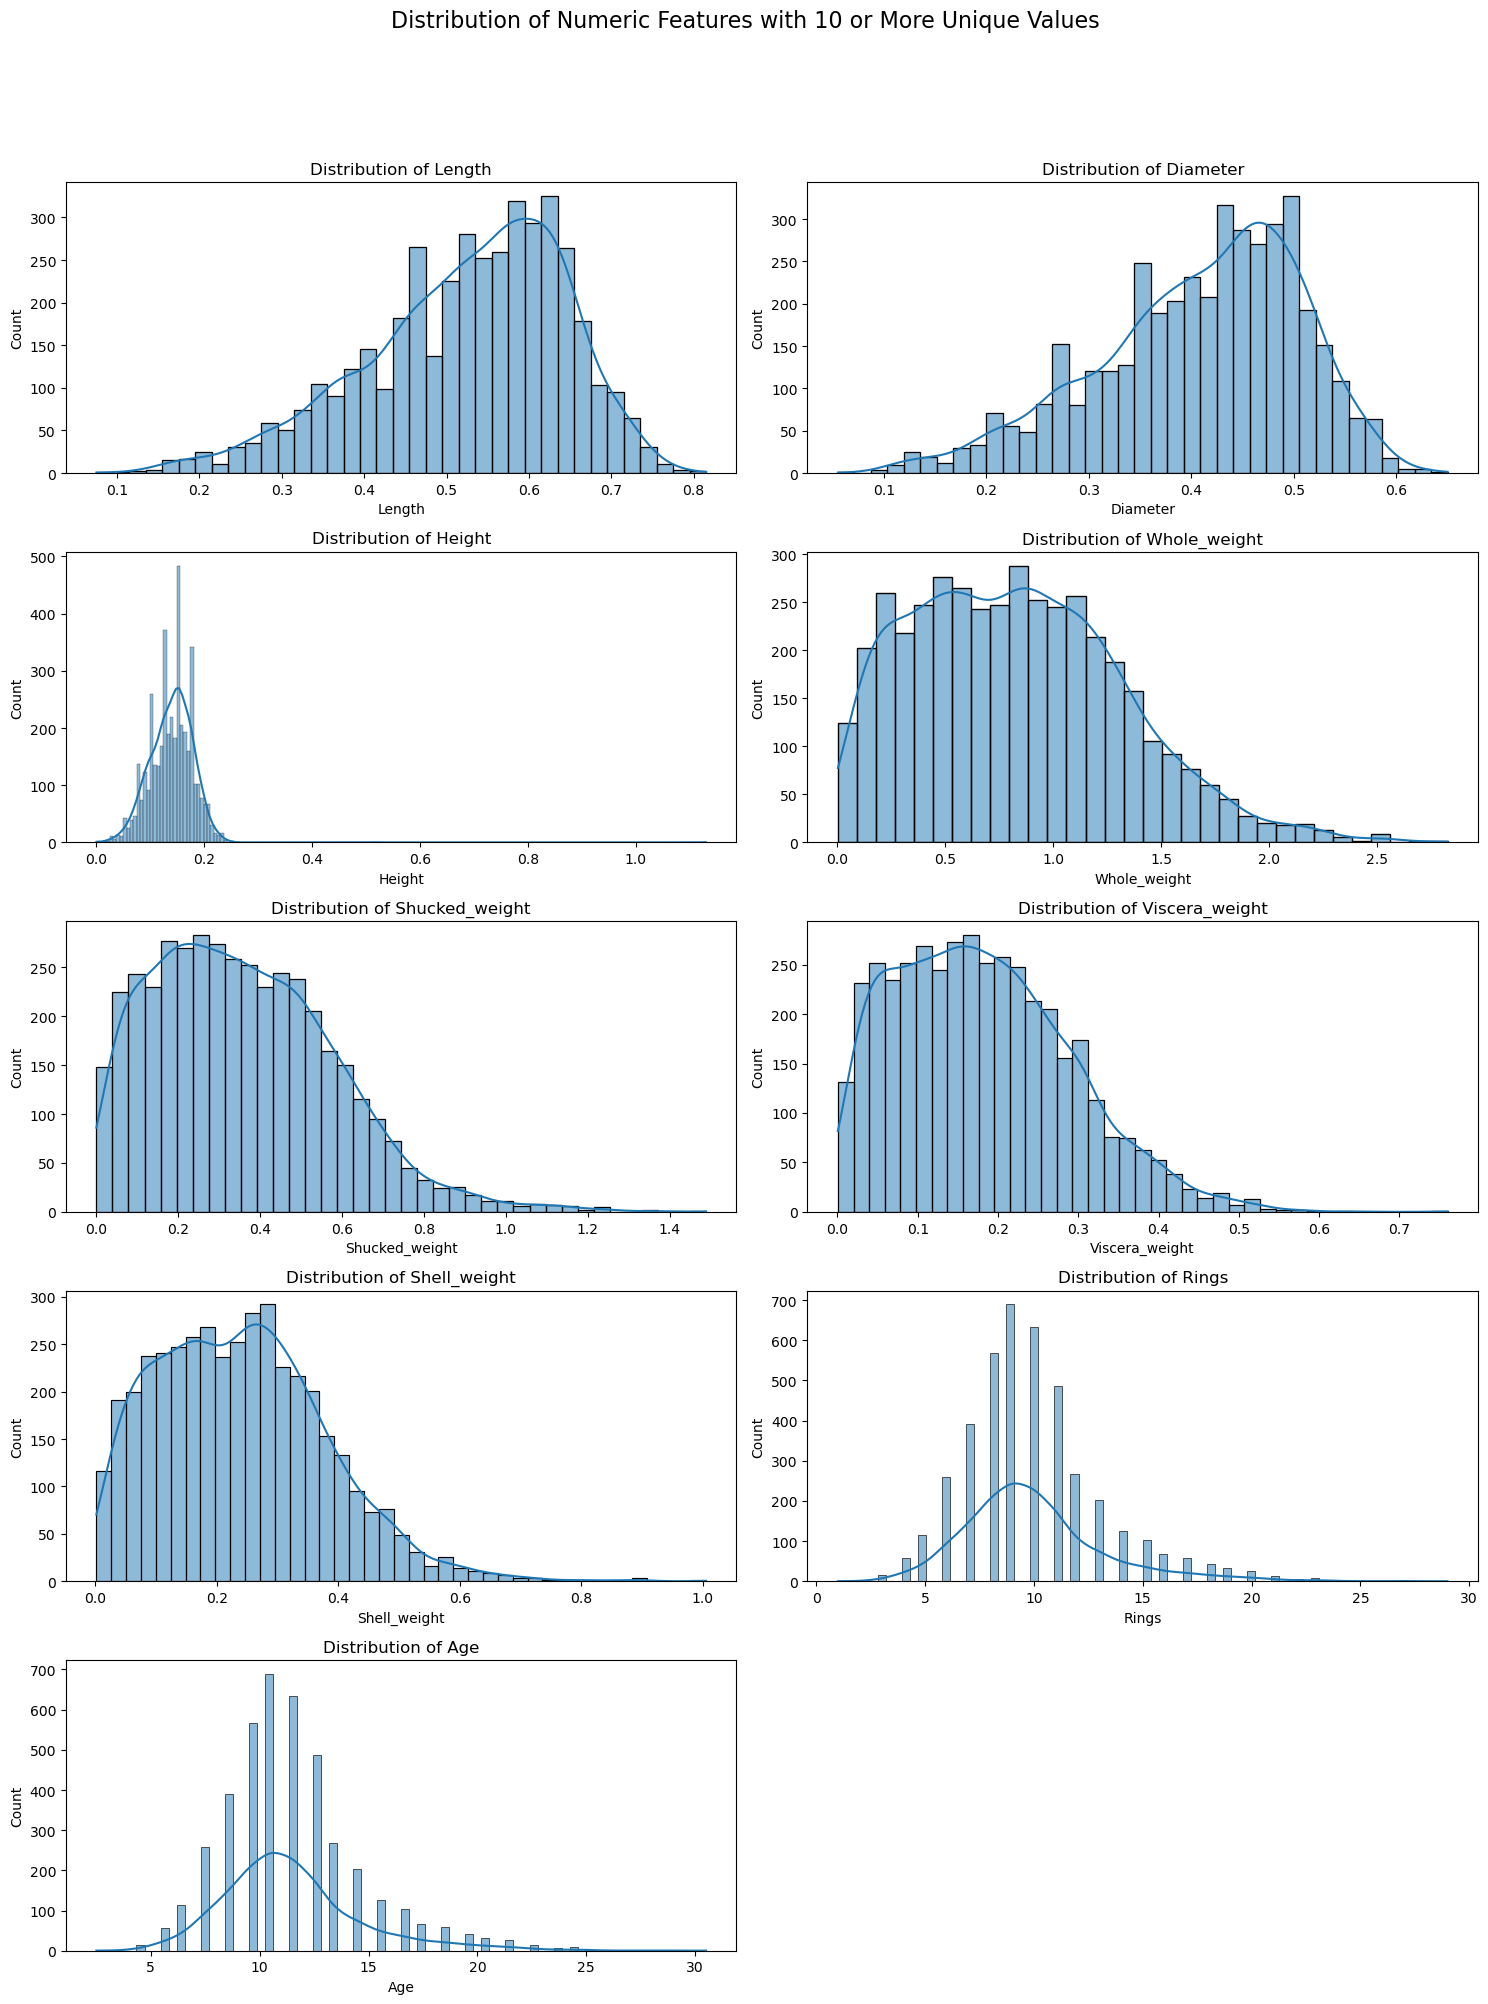

In [113]:
# Visualizing Numeric Data
# Calculating the number of rows and columns for subplots
num_cols = 2
num_rows = (len(df.nunique()[df.nunique() >= 10].index) + 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Setting a suptitle slightly above the plots
plt.suptitle('Distribution of Numeric Features with 10 or More Unique Values', fontsize=16, y=1.0)

# Flattening the axes array for easy indexing
axes = axes.flatten()

# Iterating through columns with 10 or more unique values
for i, col in enumerate(df.nunique()[df.nunique() >= 10].index):
    ax = axes[i]
    sns.histplot(df[col], kde=True, ax=ax) 
    ax.set_title(f'Distribution of {col}')  # Setting specific titles for each plot

# Hiding any unused subplots if necessary
for i in range(len(df.nunique()[df.nunique() >= 10].index), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjusting layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle

# Displaying the plots
plt.show()

##### **Observations:**

* Most columns in the dataset do not follow a normal distribution. 
* Few columns, such as shucked weight and Age, exhibit positive skewness (skewness > 0), indicating that they are skewed to the right and have a greater concentration of values in the right tail.

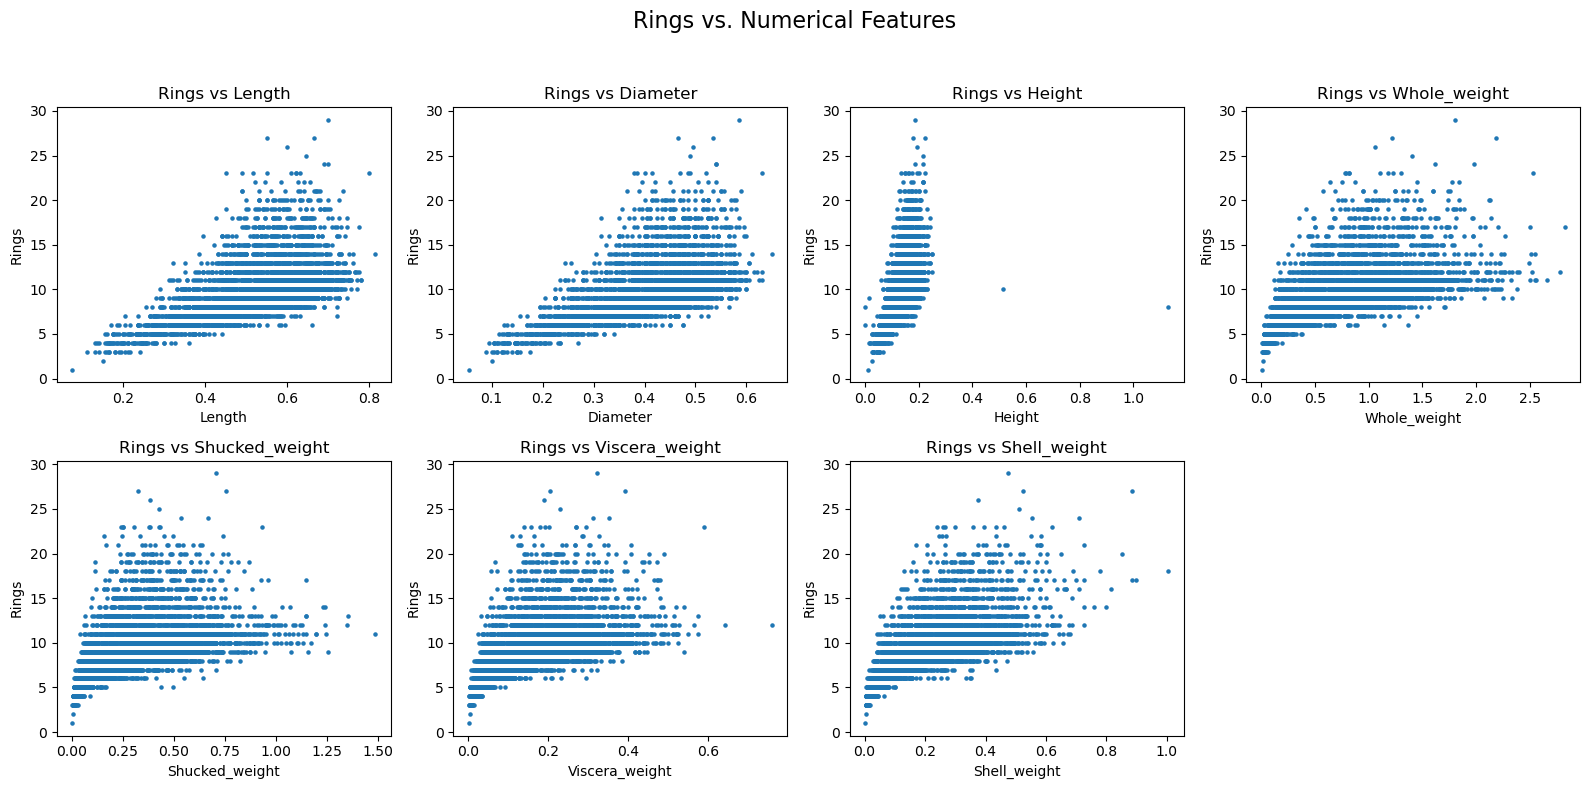

In [117]:
# Scatter Plots of Rings vs. Numerical Features
numerical_variables = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

num_cols = 4  # Number of columns for subplots
num_rows = (len(numerical_variables) + num_cols - 1) // num_cols  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
axes = axes.flatten()  

# Iterating through numerical variables to create scatter plots
for i, feature in enumerate(numerical_variables):
    axes[i].scatter(df[feature], df['Rings'], s=5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Rings')
    axes[i].set_title(f'Rings vs {feature}')

# Hiding any unused subplots if necessary
for i in range(len(numerical_variables), num_rows * num_cols):
    fig.delaxes(axes[i])


# Set a title for the entire figure
plt.suptitle('Rings vs. Numerical Features', fontsize=16)

# Adjusting layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  

# Displaying the plots
plt.show()

##### **Observations:**

The above scatter plots show that as the physical measurements (Length, Diameter, Height, and Weights) increase, the number of Rings also increases. This means that bigger and heavier abalones are usually older.


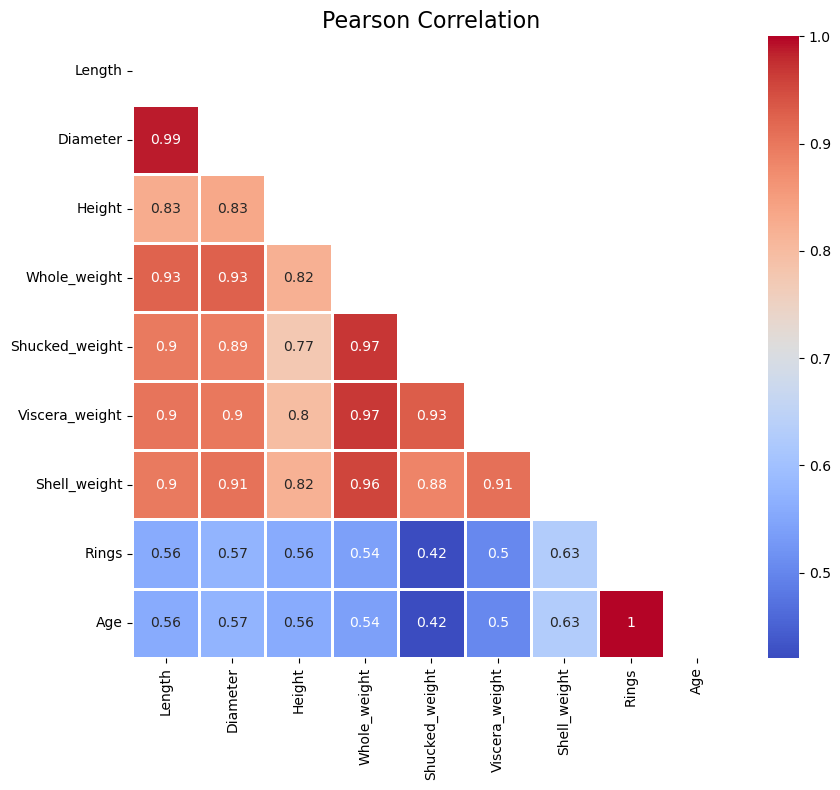

In [99]:
# Defining a function to draw a correlation heatmap
def draw_correlation_heatmap(df: pd.DataFrame, 
                             absolute=False, 
                             annot=False) -> None:
    # Selecting only numerical columns from the DataFrame
    df_numerical = df.select_dtypes(include=[np.number])
    
    # Calculating the Pearson correlation matrix
    df_corr = df_numerical.corr(method='pearson')
    
    # Taking the absolute values of correlations if specified
    if absolute:
        df_corr = df_corr.abs()
    
    # Creating a mask for the upper triangle of the heatmap
    triangle_mask = np.triu(np.ones_like(df_corr))
    
    # Setting up the figure and axis for the heatmap
    fig, ax = plt.subplots(figsize=(9, 8))
    
    # Drawing the heatmap with specified parameters
    sns.heatmap(df_corr, 
                mask=triangle_mask, 
                cmap=sns.color_palette("light:b", as_cmap=True) if absolute else 'coolwarm', 
                cbar=True, 
                linewidth=1, 
                annot=annot, 
                ax=ax)
    
    # Setting the title for the heatmap
    ax.set_title('Pearson Correlation' + (' (absolute)' if absolute else ''), fontsize=16)
    
    # Adjusting layout for better spacing
    plt.tight_layout()
    
    # Displaying the heatmap
    plt.show()

# Calling the function to draw a correlation heatmap for numerical features in df
draw_correlation_heatmap(df=df, annot=True)

##### **Observations:**

* There is an extremely high correlation between Length and Diameter.
* All features exhibit high correlation with each other.
* There is only a minor correlation between the all features and the target variable "Rings".

### 4. Feature Engineering ⚙️

In [67]:
# Encoding the sex column

encoded_df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
encoded_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


### 5. Modeling🤖

In [70]:
# Defining features (X) and target variable (y)
X = encoded_df.drop(columns=['Rings', 'Age']) 
y = encoded_df['Rings']                         

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [72]:
# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)    

In [75]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    
    # Fitting the model
    reg = model.fit(X_train_scaled, y_train)
    
    # Printing model information and scores
    print(f'Model: {type(reg).__name__}')
    print(f'Train R-squared Score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test R-squared Score: {reg.score(X_test_scaled, y_test)}')
    
    # Calculating predictions and R-squared score for test set
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Test R-squared Score (calculated): {r2}\n')

In [132]:
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [215]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}')
    print(f'Mean Absolute Error: {mean_absolute_percentage_error(y_test, model.predict(X_test_scaled))}\n')

In [76]:
test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train R-squared Score: 0.5433882652503234
Test R-squared Score: 0.5130865452704279
Test R-squared Score (calculated): 0.5130865452704279

Model: KNeighborsRegressor
Train R-squared Score: 0.66663431975606
Test R-squared Score: 0.4940212342334246
Test R-squared Score (calculated): 0.4940212342334246

Model: RandomForestRegressor
Train R-squared Score: 0.9364300366029579
Test R-squared Score: 0.5302641427578785
Test R-squared Score (calculated): 0.5302641427578785

Model: ExtraTreesRegressor
Train R-squared Score: 1.0
Test R-squared Score: 0.5222264572031048
Test R-squared Score (calculated): 0.5222264572031048

Model: AdaBoostRegressor
Train R-squared Score: 0.25712538521192374
Test R-squared Score: 0.1907007646977441
Test R-squared Score (calculated): 0.1907007646977441

Model: SVR
Train R-squared Score: 0.5547961610686971
Test R-squared Score: 0.5161032780413903
Test R-squared Score (calculated): 0.5161032780413903



##### **Observations:**

* Out of all the models we tested, the Random Forest Regressor (RFR) appears to be the best option for predicting the target variable ("Rings"). Although it has a high score on the training data, which means it fits that data well, its score on the test data shows signs of overfitting. However still, it performs better than other models, such as AdaBoost, which has much lower predictive ability.
* The model that performed the worst is the AdaBoost Regressor. It only explains about 19.1% of the variance in the test set, suggesting it struggles to find important patterns in the data.
* In summary, after evaluating several models, we believe the Random Forest Regressor is the best choice because it shows better performance on both training and testing datasets compared to the others. This makes it a reliable option for further analysis.

### 6.Hyperparameter Tuning🛠️

In [82]:
# Defining the model
model = RandomForestRegressor(random_state=1)

# Defining the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(30, 250, step=10),      # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],         # Number of features to consider at every split
    'max_depth': [None] + list(np.arange(5, 51)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),            # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),             # Minimum number of samples required to be at a leaf node
}

# Setting up RandomizedSearchCV
rfr_random_search = RandomizedSearchCV(estimator=model,
                                        param_distributions=param_dist,
                                        n_iter=200,
                                        cv=3,
                                        verbose=2,
                                        scoring='r2',
                                        random_state=1)

# Fitting the model using RandomizedSearchCV
rfr_random_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=220; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=220; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=220; total time=   0.5s
[CV] END max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=170; total time=   1.3s
[CV] END max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=170; total time=   1.3s
[CV] END max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=170; total time=   1.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=40

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29, 30, 31, 32, 33, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150,
       160, 170, 180

In [83]:
# Getting the best parameters and score
best_params = rfr_random_search.best_params_
best_score = rfr_random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R-squared Score:", best_score)

Best Parameters: {'n_estimators': 140, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 36}
Best Cross-Validation R-squared Score: 0.5561603754678663


##### **Observations:**

* The best parameters for the Random Forest model include 140 trees, which suggests a good balance between complexity and performance for our dataset.
* The cross-validation R-squared score of approximately 0.56 indicates that the model explains about 56% of the variance in the training data, which is decent but leaves room for improvement.

In [86]:
# Evaluating on test set with best estimator
best_model = rfr_random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculating evaluation metrics for test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error:", mse)
print("Test R-squared Score:", r2)

Test Mean Squared Error: 4.616945166961888
Test R-squared Score: 0.5284710563692844


##### **Observations:**

On the test set, the R-squared score drops to around 0.53, meaning the model explains about 53% of the variance, suggesting it performs reasonably well but may not generalize perfectly to unseen data.

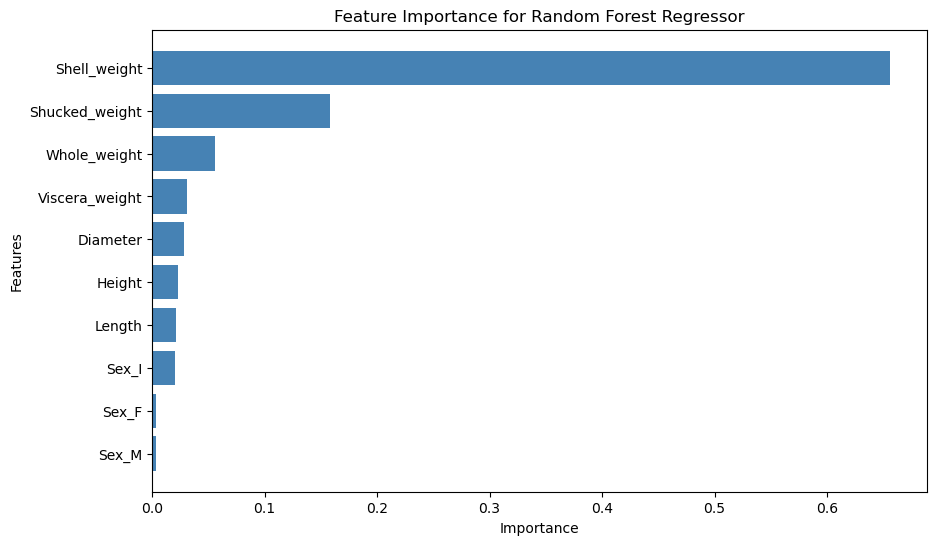

In [94]:
# Extracting feature importances
importances = best_model.feature_importances_

# Creating a DataFrame for better visualization
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                       'Importance': importances})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Steelblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Regressor')
plt.gca().invert_yaxis() #
plt.show()

##### **Observations:**
* **Dominant Feature:** Shell weight is the most important feature, accounting for approximately 65.6% of the model's predictive power, indicating it plays a crucial role in determining the target variable followed by Shucked weight  contributing about 15.8%, suggesting that it also significantly influences predictions.
* **Minimal Impact:** Features like Sex_F and Sex_M have very low importance scores (around 0.003), indicating they contribute little to the model's predictions and may not be necessary for improving performance.

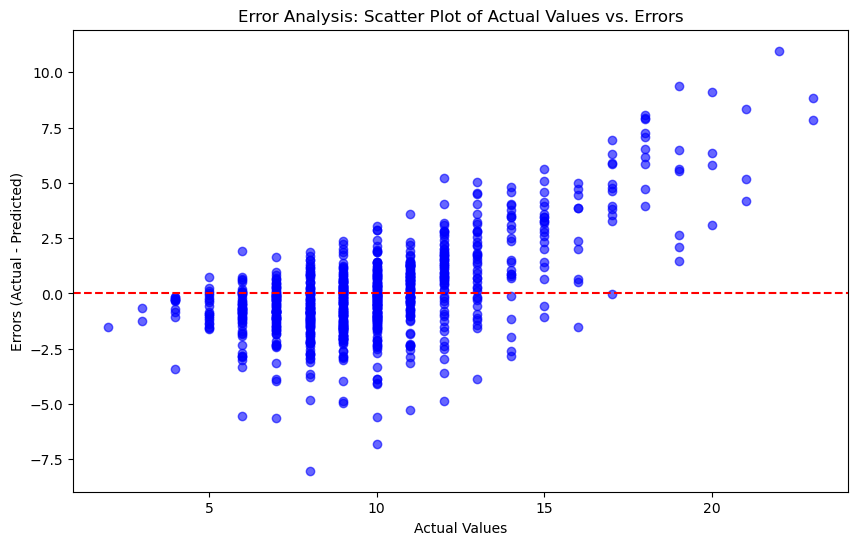

In [90]:
# Error Analysis

errors = y_test - y_pred

# Creating a scatter plot for error analysis
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, alpha=0.6, color='b')  # Scatter plot of actual values vs. errors
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero error
plt.title('Error Analysis: Scatter Plot of Actual Values vs. Errors')
plt.xlabel('Actual Values')
plt.ylabel('Errors (Actual - Predicted)')
plt.show()

##### **Observations:**
The above plot indicates that there are consistent prediction errors across different actual values

Normality tests for Random Forest Regressor (Best Model):
Shapiro-Wilk Test: Stat=0.9266, p-value=0.0000
Kolmogorov-Smirnov Test: Stat=0.1053, p-value=0.0000


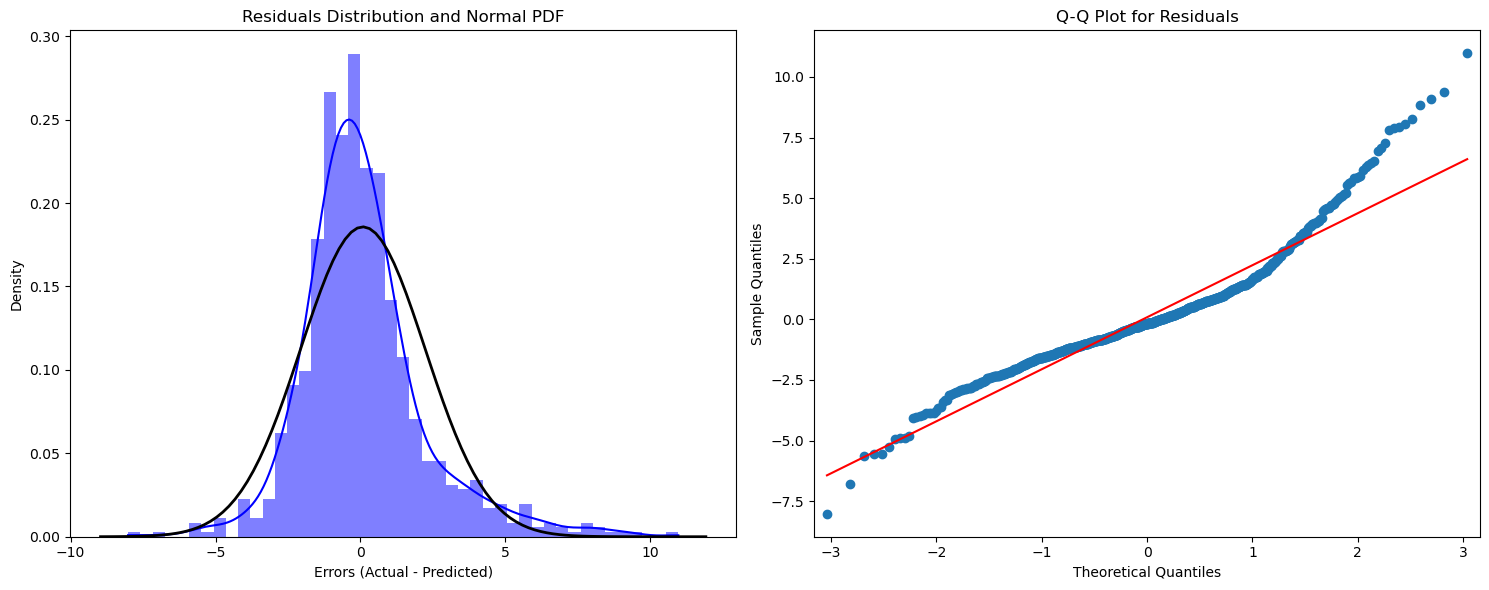

In [92]:
# Fitting the best model and make predictions
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculating errors
errors = y_test - y_pred

# Printing normality test results
print("Normality tests for Random Forest Regressor (Best Model):")

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(errors)
print(f"Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(errors, 'norm', args=(np.mean(errors), np.std(errors)))
print(f"Kolmogorov-Smirnov Test: Stat={ks_stat:.4f}, p-value={ks_p:.4f}")

# Creating a figure for plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with KDE and Normal PDF
sns.histplot(errors, kde=True, stat="density", linewidth=0, color='blue', ax=axs[0])
mu, std = norm.fit(errors)
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title("Residuals Distribution and Normal PDF")
axs[0].set_xlabel("Errors (Actual - Predicted)")
axs[0].set_ylabel("Density")

# Q-Q Plot
qqplot(errors, line='s', ax=axs[1])
axs[1].set_title("Q-Q Plot for Residuals")

plt.tight_layout()
plt.show()

##### **Observations from above Normality Tests**

1. **Shapiro-Wilk Test Result**: The Shapiro-Wilk test statistic is approximately 0.9266, and the p-value is 0.0000. This very low p-value indicates that we reject the null hypothesis, which states that the errors are normally distributed. This means that the residuals (errors) do not follow a normal distribution.

2. **Kolmogorov-Smirnov Test Result**: The Kolmogorov-Smirnov test statistic is about 0.1053, with a p-value of 0.0000 as well. Like the Shapiro-Wilk test, this p-value suggests that we reject the null hypothesis of normality. This reinforces our earlier finding that the errors are not normally distributed.

3. **Implications for Model Performance**: Since both tests indicate that the residuals are not normally distributed, it may suggest that the model could be missing some patterns in the data or that there are outliers affecting predictions. This could be an area to explore further to improve model accuracy and robustness.